# 1. 扩展欧几里得算法

## ?翡蜀定理: 对于任意整数a, b, m; 求解未知整数x, y时, 对于一下形式:
- ax + by = m

## 上述有解必须满足: gcd(a, b) | m 即m时gcd(a, b)的倍数
- 特殊的: ax + by = 1 有解等价于 gcd(a, b) = 1
## 因此我们先实现满足这个解的(x1, y1)

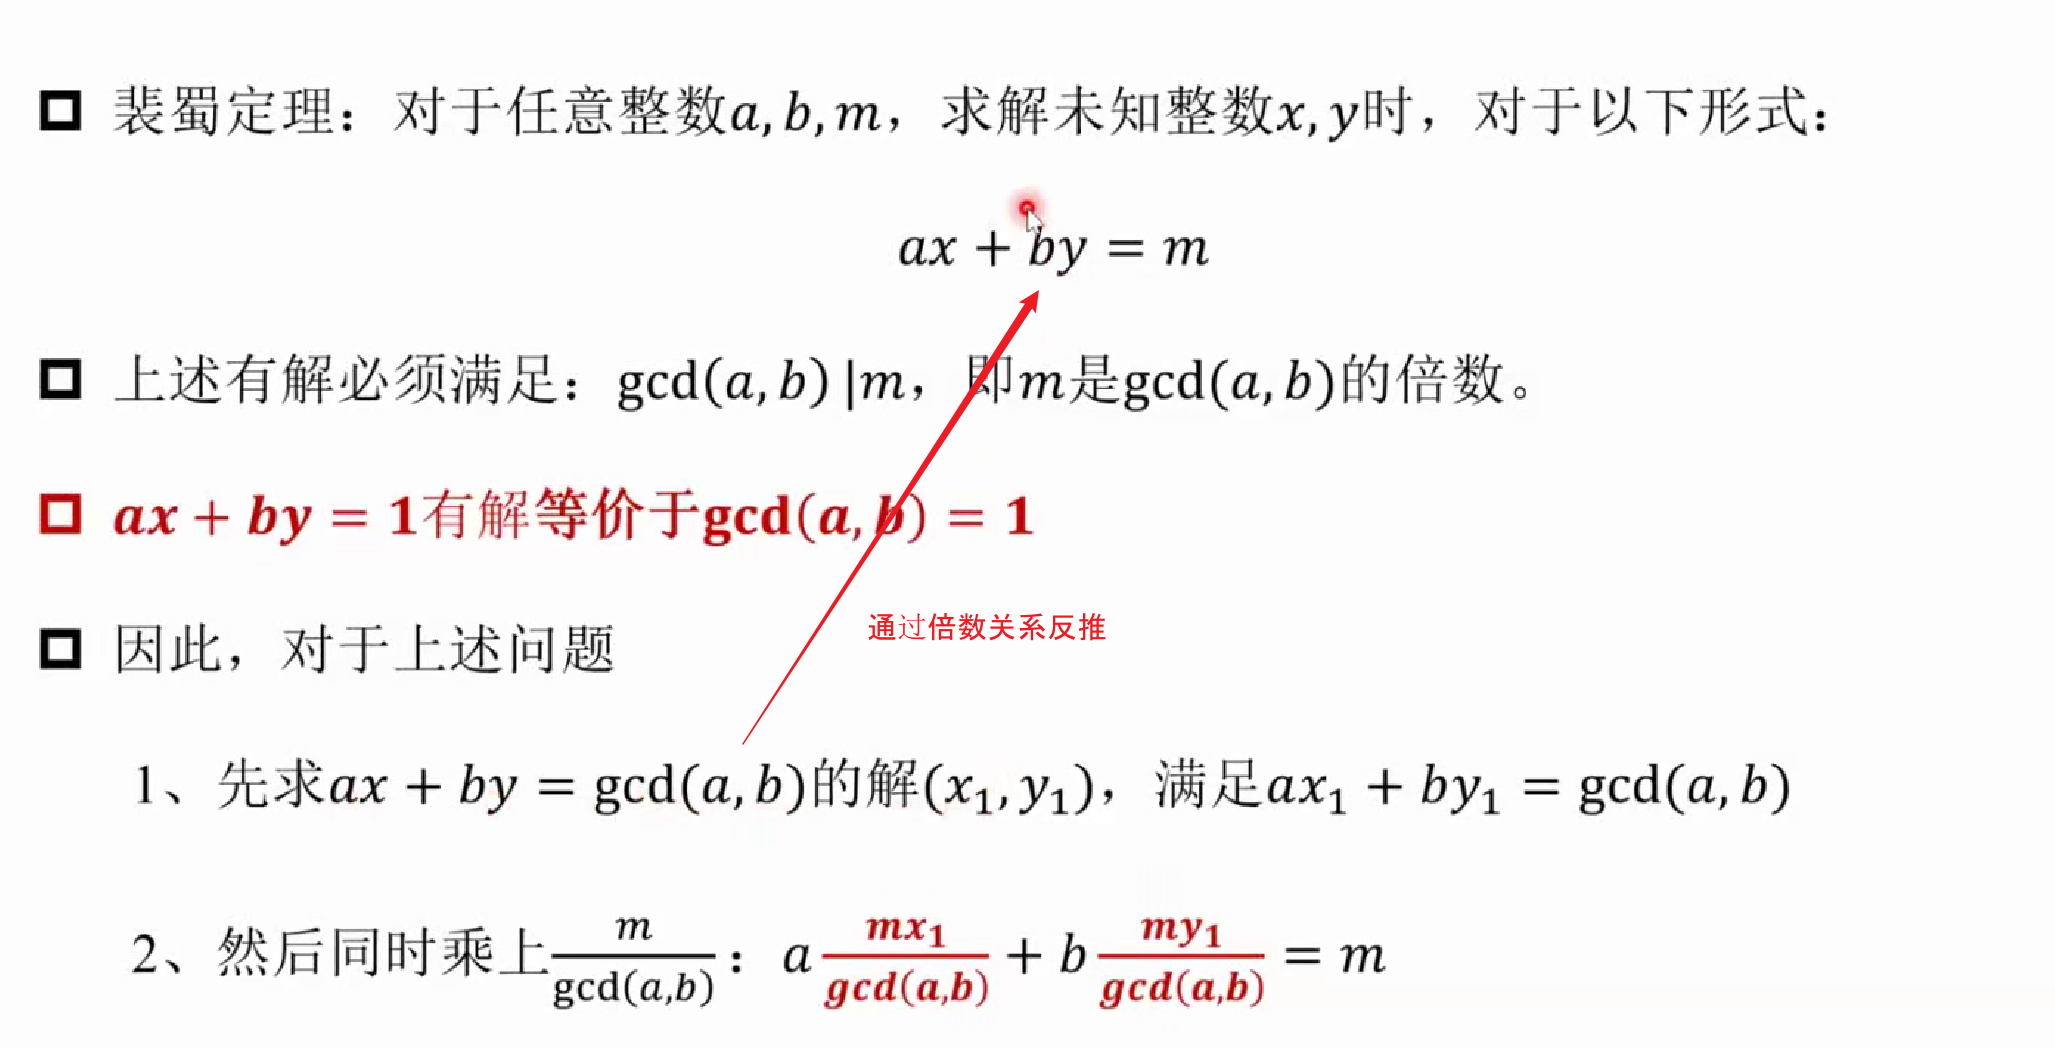

- 考虑简化版的问题
  - 如何求解? ax + by = gcd(a, b) ,(假定a >= b)
  - 


! a % b = a - (a // b) * b








In [15]:
def exgcd(a, b):
    # 求解 ax + by = gcd(a, b)的任意一组解
    
    # 返回gcd, x, y
    if b == 0:
        return a, 1, 0
    
    g, x2, y2 = exgcd(b, a % b)
    x1, y1 = y2, x2 - (a // b) * y2
    return g, x1, y1


print(exgcd(10, 2))

(2, 0, 1)


如果求出的m不是gcd(a, b)的倍数, 则无解

如果m是gcd(a, b)的倍数, x1, y1乘上m // gcd(a, b)

原来的特解 => x0 = x1 * (m // gcd(a, b)); y0 = y1 * (m // gcd(a, b))

方程的通解 => x = x0 + (b // gcd(a, b)) * t; y = y0 - (a // gcd(a, b)) * t

x0 的循环节 => (b // gcd(a, b))

y0 的循环节 => (a // gcd(a, b))

In [ ]:
def Func(a, b, m):
    # ax + by = m
    g, x1, y1 = exgcd(a, b)
    # m必须是g的倍数才有解
    if m % g != 0:
        return None, None, None
    x0, y0 = x1 * m // g, y1 * m // g
    return g, x0, y0

print(Func(10, 6, 42))

(2, -21, 42)


# 2. 逆元

In [17]:
def Inv(a, n):
    g, x ,y = Func(a, n, 1)
    if x is None:
        return None
    else:
        return (x % n + n) % n # 保证 1~n

print(Inv(3, 10))

7
